In [8]:
# ploting this figure needs raw data that we can't disclose, and we have uploaded the aggregated data that is able to reproduce the figure
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator

In [9]:
data = pd.read_excel('E:/vcdata/vcdata(91-17-new).xlsx')
# data.rename(columns={'投资金额(RMB)':'new_money',}, inplace = True)
dataVC = pd.read_excel('E:/vcdata/vcAmountaandTimes(91-17).xlsx')
dataVC2 = pd.read_excel('E:/vcdata/vcAmountaandTimes(91-17-5indes).xlsx')

In [10]:
data.columns

Index(['city', 'year', 'P/E', '企业估值', '企业估值(USD/M)', '企业净利润(百万元)',
       '企业净资产(百万元)', '企业名称', '企业总资产(百万元)', '企业销售收入(百万元)', '地区', '币种or投资人',
       '投资人', '投资币种', '投资类型', '投资阶段', '机构名称', '股权', '股权%', '行业(国标)', '行业(清科)',
       '行业(证监会)', '轮次', '投资方', '基金名称', '企业标签', '投资策略', '上市交易所', '投资时间', '三级代码',
       '三级产业名称', '二级代码', '二级名称', '一级字母代码', '一级名称', '一二三产业', '投资金额(M)', '补全的地区',
       '实际地区', 'change', '投资金额(RMB)'],
      dtype='object')

In [11]:
len(data['city'].drop_duplicates().values)

339

In [12]:
i=4
data.iloc[i:i+1,40:41]

,投资金额(RMB)
4,84.5788


In [13]:
cityvc = data.groupby('year')
yearsL = list(map(str,list(range(1991,2018))))
Ytimes=[]
Amount = []
for cc in cityvc:
    times = 0
    index = 0 ###标识是否存在
    amount = 0
    for i in range(cc[1].shape[0]):
        times += 1
        if cc[1].iloc[i:i+1,40:41].values[0][0]!= '--':
            
            index = 1
            amount += cc[1].iloc[i:i+1,40:41].values[0][0]
    Ytimes.append(times)
    if index == 1:        
        Amount.append(amount)
    else:
        Amount.append(0)

In [14]:
len(Amount)

27

In [15]:
# Amount

In [16]:
dataVC.iloc[0:1,2+27*2:2+27*3]

,1991投资次数(有金额),1992投资次数(有金额),1993投资次数(有金额),1994投资次数(有金额),1995投资次数(有金额),1996投资次数(有金额),1997投资次数(有金额),1998投资次数(有金额),1999投资次数(有金额),2000投资次数(有金额),...,2008投资次数(有金额),2009投资次数(有金额),2010投资次数(有金额),2011投资次数(有金额),2012投资次数(有金额),2013投资次数(有金额),2014投资次数(有金额),2015投资次数(有金额),2016投资次数(有金额),2017投资次数(有金额)
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
sumAmount = dataVC.iloc[:,2:2+27].apply(lambda x: x.sum(), axis=0) ### Every year investment amount
sumTimes = dataVC.iloc[:,2+27:2+27*2].apply(lambda x: x.sum(), axis=0) ### Every year investment times
sumTimesFind = dataVC.iloc[:,2+27*2:2+27*3].apply(lambda x: x.sum(), axis=0) ### Every year investment times
sumTimesUnknown = dataVC.iloc[:,2+27*3:2+27*4].apply(lambda x: x.sum(), axis=0) ### Every year investment times

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


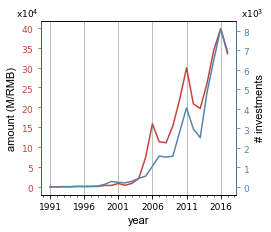

In [44]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 11,
}###设置横纵坐标的字体格式

############## 用科学计数法表示坐标 ################
x=np.arange(1991,2018)
yearsL = list(map(str,list(range(1991,2018))))
y=sumAmount
fig = plt.figure(figsize=(3.5,3.2))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=9) #刻度字体大小13
 
ax1 = fig.add_subplot(111)
ax1.plot(yearsL,Amount, color = '#c44240',linewidth=1.5)
# ax1.set_yscale('log')
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.set_xlabel('year',font2)
# ax1.legend(loc='upper left')
ax1.yaxis.set_tick_params(color='#c44240',colors='#c44240',labelsize=9)
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % (x/10000)
#     return '$%.1f$x$10^{4}$' % (x/10000)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(yearsL,Ytimes,  color = '#5684ae',linewidth=1.5)
ax2.set_ylabel('# investments',font2)
ax2.spines['left'].set_color('#c44240')
ax2.spines['right'].set_color('#5684ae')
ax2.yaxis.set_tick_params(color='#5684ae',colors='#5684ae',labelsize=9)
ax2.yaxis.set_major_formatter(formatter2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.text(28, 8700, r'x$10^{3}$',size=9)
plt.text(-5,8700, r'x$10^{4}$',size=9)
# plt.savefig('E:/vcdata/pic/picSC/Fig1a.pdf',bbox_inches='tight')
# plt.savefig('E:/0论文/0picture/3_1.jpg',dpi=200, bbox_inches='tight')
plt.savefig('E:/0论文/1picture/2_1.jpg', dpi=500,bbox_inches='tight')
plt.show()

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


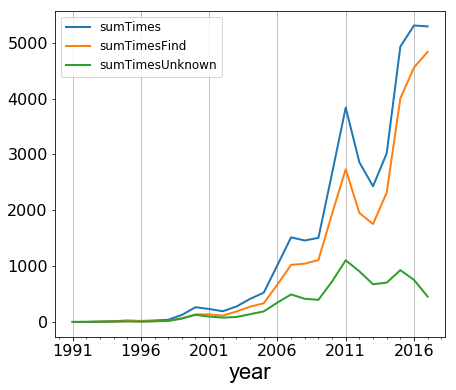

In [29]:
fig = plt.figure(figsize=(7,6))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13 
ax1 = fig.add_subplot(111)
# plt.xticks(rotation=45)
ax1.plot(yearsL,sumTimes,linewidth=2,label = 'sumTimes')
ax1.plot(yearsL,sumTimesFind,linewidth=2,label = 'sumTimesFind')
ax1.plot(yearsL,sumTimesUnknown,linewidth=2,label = 'sumTimesUnknown')
ax1.set_xlabel('year',font2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.legend(fontsize = 12)
plt.savefig('E:/vcdata/pic/Fig1b.pdf')
plt.show()

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


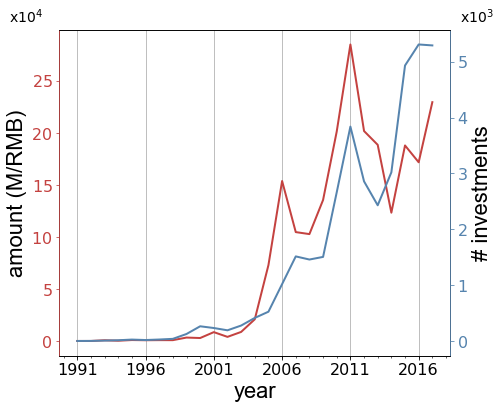

In [30]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 22,
}###设置横纵坐标的字体格式

############## 用科学计数法表示坐标 ################
x=np.arange(1991,2018)
yearsL = list(map(str,list(range(1991,2018))))
y=sumAmount
fig = plt.figure(figsize=(7,6))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13
 
ax1 = fig.add_subplot(111)
ax1.plot(yearsL,sumAmount, color = '#c44240',linewidth=2)
# ax1.set_yscale('log')
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.set_xlabel('year',font2)
# ax1.legend(loc='upper left')
ax1.yaxis.set_tick_params(color='#c44240',colors='#c44240',labelsize=16)
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % (x/10000)
#     return '$%.1f$x$10^{4}$' % (x/10000)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(yearsL,sumTimes,  color = '#5684ae',linewidth=2)
ax2.set_ylabel('# investments',font2)
ax2.spines['left'].set_color('#c44240')
ax2.spines['right'].set_color('#5684ae')
ax2.yaxis.set_tick_params(color='#5684ae',colors='#5684ae',labelsize=16)
ax2.yaxis.set_major_formatter(formatter2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.text(28, 5700, r'x$10^{3}$',size=14)
plt.text(-5,5700, r'x$10^{4}$',size=14)
plt.savefig('E:/vcdata/pic/Fig1a_2.pdf')
plt.show()

In [43]:
sumAmount2 = dataVC2.iloc[:,2:2+27].apply(lambda x: x.sum(), axis=0) ### Every year investment amount
sumTimes2 = dataVC2.iloc[:,2+27:2+27*2].apply(lambda x: x.sum(), axis=0) ### Every year investment times
sumTimesFind2 = dataVC2.iloc[:,2+27*2:2+27*3].apply(lambda x: x.sum(), axis=0) ### Every year investment times
sumTimesUnknown2 = dataVC2.iloc[:,2+27*3:2+27*4].apply(lambda x: x.sum(), axis=0) ### Every year investment times
sumTimesFind02 = dataVC2.iloc[:,2+27*4:2+27*5].apply(lambda x: x.sum(), axis=0) ### Every year investment times

In [44]:
dataVC2.iloc[0:1,3:3+27]

,1992总投资金额(M),1993总投资金额(M),1994总投资金额(M),1995总投资金额(M),1996总投资金额(M),1997总投资金额(M),1998总投资金额(M),1999总投资金额(M),2000总投资金额(M),2001总投资金额(M),...,2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M),1991总投资次数
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


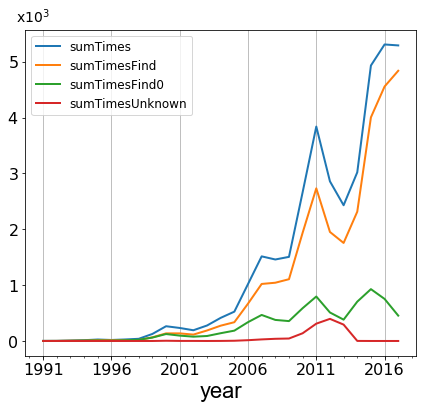

In [45]:
fig = plt.figure(figsize=(7,6))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13 
ax1 = fig.add_subplot(111)
# plt.xticks(rotation=45)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter2)
ax1.plot(yearsL,sumTimes2,linewidth=2,label = 'sumTimes')
ax1.plot(yearsL,sumTimesFind2,linewidth=2,label = 'sumTimesFind')
ax1.plot(yearsL,sumTimesUnknown2,linewidth=2,label = 'sumTimesFind0')
ax1.plot(yearsL,sumTimesFind02,linewidth=2,label = 'sumTimesUnknown')
ax1.set_xlabel('year',font2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.yaxis.set_major_formatter(formatter2)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.text(-2, 5700, r'x$10^{3}$',size=14)
plt.legend(fontsize = 12)
plt.savefig('E:/vcdata/pic/Fig1b_2.pdf')
plt.show()

In [141]:
[(sumTimesFind[i]  - sumTimesFind2[i]  - sumTimesFind02[i]) for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [150]:
[(sumTimesUnknown2[i]  - sumTimesUnknown[i]) for i in range(10)]
len(sumTimesFind02)

27

In [40]:
#### 城市投资次数占比情况 行取和
sumAmount3 = dataVC2.iloc[:,2:2+27].apply(lambda x: x.sum(), axis=1) ### Every year investment amount
sumTimes3 = dataVC2.iloc[:,2+27:2+27*2].apply(lambda x: x.sum(), axis=1) ### Every year investment times
sumTimesFind3 = dataVC2.iloc[:,2+27*2:2+27*3].apply(lambda x: x.sum(), axis=1) ### Every year investment times
sumTimesUnknown3 = dataVC2.iloc[:,2+27*3:2+27*4].apply(lambda x: x.sum(), axis=1) ### Every year investment times
sumTimesFind03 = dataVC2.iloc[:,2+27*4:2+27*5].apply(lambda x: x.sum(), axis=1) ### Every year investment times

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


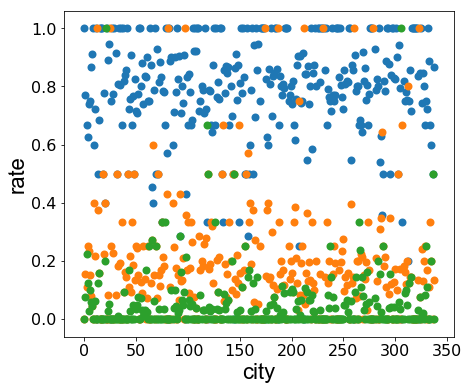

In [41]:
fig = plt.figure(figsize=(7,6))
x = np.arange(dataVC2.shape[0])
# xmajorLocator = MultipleLocator(20)
# xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13 
ax1 = fig.add_subplot(111)
# plt.xticks(rotation=45)
# def formatnum2(x, pos):
#     return '$%.0f$' % (x/1000)
# formatter = FuncFormatter(formatnum)
# formatter2 = FuncFormatter(formatnum2)
# ax1.yaxis.set_major_formatter(formatter2)
# ax1.scatter(x,[sumTimes3[i]/sumTimes3[i] for i in range(len(sunmTimes3],linewidth=2,label = 'sumTimes')
ax1.scatter(x,[sumTimesFind3[i]/sumTimes3[i] for i in range(len(sumTimes3))],linewidth=2,label = 'sumTimesFind')
ax1.scatter(x,[sumTimesUnknown3[i]/sumTimes3[i] for i in range(len(sumTimes3))],linewidth=2,label = 'sumTimesUnknown')
ax1.scatter(x,[sumTimesFind03[i]/sumTimes3[i] for i in range(len(sumTimes3))],linewidth=2,label = 'sumTimesFind0')
plt.xlabel('city',font2)
plt.ylabel('rate',font2)
# ax1.set_xlabel('city',font2)
# ax1.xaxis.set_major_locator(xmajorLocator)
# ax1.xaxis.set_minor_locator(xminorLocator)
# ax1.yaxis.set_major_formatter(formatter2)
# ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
# plt.text(-2, 7700, r'x$10^{3}$',size=14)
# plt.legend(fontsize = 12)
plt.savefig('E:/vcdata/pic/Fig1b_3.pdf')
plt.show()